# Webscraping-Intro mit TechLabs & Westfalen AG
__Oder: Wie kann ich die Informationsflut aus dem Internet für mich nutzen?__

_TechLabs Meeting 23.01.2019_ 

![](https://westfalen.com/fileadmin/_processed_/3/7/csm_M212_SGETS_BAT_Brockbachtal_235_FB_klein_1900_9f3fdf76d0.jpg)



---



## Ziel des Workshops

Wir möchten euch zeigen wie effektiv selbst kleine Coding-Skills in der Praxis eingesetzt werden können. Unser Ziel bei TechLabs ist es ohne große Theorie-Blöcke schnell und effektiv unsere ersten kleinen Tech-Projekte umzusetzen – und das machen wir heute in weniger als 2 Stunden. 

## **Das Problem:**
Wer kennt es nicht: die Benzinpreise bei Tankstellen ändern sich von Stunde zu Stunde. Aber welche Westfalen-Tankstelle hat denn gerade wirklich den günstigsten Preis? Gibt es Unterschiede zwischen den einzelnen Tankstellen? Wo sollte ich tanken? 

Natürlich könnten wir einfach alle Tankstellen unter [auf dem Westfalen-Tankstellenfinder](https://westfalen.com/de/de/tankstellen-mobilitaet/) durchgehen und dort die Preise nachschauen. Das ist uns zu umständlich! Wir möchten das komplett automatisieren und alle Preise auf einen Blick per Knopfdruck sehen.

## Die Lösung: **Webscraping**. 
Webscraping ist eine Technik zur Extraktion großer Datenmengen von Websites. Auf den meisten Websites lassen sich die Daten nur über den Browser ansehen. Sie müssten mit hohem zeitlichen Aufwand manuell per Copy&Paste (z.B. in eine Excel-Datei) ausgelesen werden – das würde je nach Datenmengen Stunden, Tage, oder sogar Jahre dauern. Webscraping hilft uns dieses Auslesen innerhalb von Sekunden automatisiert zu lösen.


Auf dem Weg zum Ziel werden wir heute gemeinsam...

... die **Grundstruktur von Webseiten** verstehen.

... ein erstes kleines **Programm in der Programmiersprache Python** schreiben. 

... lernen wie man **Informationen auf Websites auslesen** kann.

... an einem kleinen Beispiel die **extrahierten Informationen nutzbar machen**.



---



Natürlich ist das ganze hier erst einmal ein "kleines" Beispielprojekt, das mit etwas Mehraufwand beliebig erweitert werden kann mit zusätzlichen Ortsinfos und vielem mehr. Be creative!

Also: los geht's mit unserem ersten kleinen Projekt.

## Schritt 1: Identifikation der Datenquellen

Natürlich gelingt das Projekt nur, wenn wir entsprechende Daten für unser Projektziel bekommen. Der erste Schritt ist also zu schauen wo wir die gewünschten Daten finden. 

Bei uns ist diese Quelle schnell gefunden: auf westfalen.com gibt es einen [Tankstellenfinder](https://westfalen.com/de/de/tankstellen-mobilitaet/), über den man nach Tankstellen suchen kann.

![Tankstellenfinder](https://drive.google.com/uc?id=15JQgXChGRSuqaB_dRwyHpuR2rH-RhjlE =500x)
![Tankstellenfinder](https://drive.google.com/uc?id=1GK3Np1jq5VlSr-GasTfvs3QJ75tICBqE =500x)



---


_Anmerkung: Üblicherweise wird der Programmcode selbst wie auch die Dokumentation in der Praxis auf Englisch geschrieben. Das erleichtert nicht nur die Integration internationaler Teammitglieder, sondern hilft vor allem, wenn man in Online-Foren nach Hilfe für einzelne Abschnitte sucht und seinen Code-Ausschnitt dort postet (das wird selbst – bzw. gerade – bei erfahrenen Programmierern regelmäßig vorkommen). Daher wird auch der Rest des Notebooks in Englisch gehalten._

---



## Schritt 2: Websites verstehen

https://flukeout.github.io

## Schritt 3: Python-Basics verstehen

- Variablen
- Funktionen
- Schleifen

## Schritt 4: "Setup" des Programms

In der Coding-Welt steht man immer "auf den Schultern von Riesen". Das heißt: wirklich jedes(!) Programm basiert auf der Vorarbeit von Menschen, die uns einzelne Aufgaben vorab abgenommen haben, sodass wir nicht jedes Detail neu programmieren müssen. Selbst von noch niemand vor uns die Aufgabe "Preise von Tankstellen auslesen" gelöst hat: es gibt bestimmt Leute, die schon einmal Website-Code ausgelesen haben. Oder mit Tabellen gearbeitet haben. Oder Tabellen abspeichern wollten. All diese "Aufgaben" sind in Programmcode verpackt, den wir zu Beginn importieren. Was genau da passiert, das brauchen wir aktuell nicht verstehen. 

Es reicht eine Sache zu verstehen: wir importieren hier "Funktionen" quasi als "Add-Ons"/"Mini-Programme", die wir später im Workshop nutzen können.

### Aufgabe: Code-Block unten ausführen.
Damit wir alle Module richtig importieren, führt den Block unten aus. 

In [0]:
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests
# Here we import the most famous and popular data science package in Python: Pandas!
import pandas as pd
# also import other needed packages
import time

# other needed libraries
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Schritt 5: Eine Website auslesen

Wir wollen nun den Inhalt einer einzelnen Website auslesen. Und zwar nicht irgendeiner, sondern einer einzelnen Tankstellen-Seite. Diese hat glücklicherweise immer dieselbe Struktur und sieht wie folgt aus:

![Tankstellenseite](https://drive.google.com/uc?id=1j0STns-mAx1gI_cPWhpR8kVMqbLTibOQ =500x)



### Aufgabe: Den Inhalt der Website unter die Lupe nehmen
Besucht die Seite oben und Schaut euch den Quelltext der Seite unter https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-212-216/ an. Im Browser Chrome dafür z.B. einfach "F12" drücken.

Genau diesen Quelltext können wir mit den folgenden Zeilen Code auch hier im Programm auslesen. Dazu nutzen wir das Python-Modul "Requests":




In [0]:
# here we access the webpage and download the content using requests
tankeRequest = requests.get("https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-212-216/")

In [93]:
# the "response" of our requests is saved in the variable "tankeRequest". Let's see what's in there:
tankeRequest

<Response [200]>

`<Response [200]>` sagt uns noch nicht viel oder? Das soll die Seite sein? Ja! Denn Code "200" bedeutet in dem Fall wir haben erfolgreich den Inhalt der gesamten Seite in der Variable `tankeRequest` gespeichert. Jetzt wollen wir aber mal reingucken. Dazu wandeln wir das ganze in ein "BeautifulSoup"-Objekt um. "BeautifulSoup" ist ein sogenannten "Framework", d.h. eine Sammlung an vielen tollen Funktionen, die wir nutzen können, um uns das Leben einfacher zu machen. Im ersten Schritt hilft uns das, um einfach den gesamten Quelltext aus unserem Objekt `tankeRequest` anzuschauen:

In [0]:
# We'll just reuse the request object that was previously created to create a BeautifulSoup element.
tankeSeite_text = BeautifulSoup(tankeRequest.text, "html.parser")

Wenn man folgenden Block ausführt, sollte der gesamte Quelltext der Seite erscheinen:

In [0]:
# let's have a look what we just saved in our variable "tankeSeite_text"
tankeSeite_text

Und jetzt beginnen wir das anzuwenden, was wir gerade spielerisch am Beispiel des "CSS Tables" gelernt haben! Wir wollen jetzt nämlich nur den Block an Quelltext haben, der die Preisinformationen enthält. Das Objekt tankeSeite_text können wir jetzt nämlich über die Funktion ".select()" filtern. Einfach den CSS-Selektor in die Klammer packen und schauen, was am Ende rauskommt!

Hier holen wir uns jetzt erst einmal den gesamten "Preisblock" von der Tankstellen-Seite:

![Tankstellenseite](https://drive.google.com/uc?id=1A1N9OsJ-_U1ocf17gCST57adNZIgQcgQ =500x)

In [0]:
# get links for all offers on the first page. Therefore, first get all the titles of each offering
priceBlock = tankeSeite_text.select("div.row.price")

Mal schauen, was sich nun in unserem Objekt priceBlock versteckt:

In [98]:
print(priceBlock)

[<div class="row price">
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>Super</sup></div>
<div class="price">1.40<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>Super E10</sup></div>
<div class="price">1.38<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>Diesel</sup></div>
<div class="price">1.28<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>Lkw-Diesel</sup></div>
<div class="price">1.27<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>AdBlue</sup></div>
<div class="price">0.59<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name"><sup>Autogas</sup></div>
<div class="price">0.65<sup>9</sup></div>
</div>
</div>
<div class="col-12 col-md-4">
<div class="wrapper">
<div class="name

Das sieht schon etwas übersichtlicher aus. Jetzt wollen wir unserem Ziel etwas näher kommen und holen uns von diesem Block nur die Elemente, die in der "Wrapper"-Class stecken. Das funktioniert genauso wie gerade. Das Ergebnis davon nennen wir einfach mal "priceList":

In [97]:
priceList = priceBlock[0].select("div.wrapper")
print(priceList)

[<div class="wrapper">
<div class="name"><sup>Super</sup></div>
<div class="price">1.40<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>Super E10</sup></div>
<div class="price">1.38<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>Diesel</sup></div>
<div class="price">1.28<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>Lkw-Diesel</sup></div>
<div class="price">1.27<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>AdBlue</sup></div>
<div class="price">0.59<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>Autogas</sup></div>
<div class="price">0.65<sup>9</sup></div>
</div>, <div class="wrapper">
<div class="name"><sup>Super Plus</sup></div>
<div class="price">1.50<sup>9</sup></div>
</div>]


Wir haben ein Listen-Objekt mit insgesamt 7 Elementen (jeweils durch ein Komma oben getrennt). Wir können jetzt z.B. das ersten Element dieser Liste holen (durch die eckige Klammer [0] gezeigt, da Python immer bei 0 anfängt zu zählen), das auf den CSS-Selektor ".name" hört:

In [82]:
priceItem.select(".name")[0].text

'Super Plus'

Jetzt wir es spannend, denn wir kommen den Preise langsam näher. Zunächst erzeugen wir ein sogenanntes "Dictionary". Das funktioniert genauso wie ein echtes "Dictionary": man kann jedem Schlüsselwort einen Wert zuweisen. Beispiel:

In [99]:
testDictionary = {'Westfalen_Teilnehmer': 20, 'TechLabs_Teilnehmer': 35}
print(testDictionary)

{'Westfalen_Teilnehmer': 20, 'TechLabs_Teilnehmer': 35}


Man kann dieses Dictionary natürlich auch nachträglich ergänzen:

In [101]:
testDictionary['Externe_Teilnehmer'] = 5
print(testDictionary)

{'Westfalen_Teilnehmer': 20, 'TechLabs_Teilnehmer': 35, 'Externe_Teilnehmer': 5}


Diese Technik nutzen wir jetzt, um nach und nach unsere Preise für die aktuelle Tankstelle abzuspeichern:
Das "Schlüsselwort" soll jeweils der Name des Produkts sein (z.B. "Autogas") und der dazugehörige Wert dann der Preis.

1.   Wir erzeugen also zunächst ein leeres price_dictionary
2.   Dann durchlaufen wir jedes der Elemente unserer "Preisliste" priceList
3.   Für jedes Element lesen wir den Namen und den Preis (wieder über den "CSS-Selektor") aus und speichern ihn temporär in einer Variable.
4.   Schließlich fügen wir dem Dictionary die Name-Preis-Kombination hinzu.

In [0]:
price_dictionary = {}
for priceItem in priceList:
  itemName = priceItem.select(".name")[0].text
  itemPrice = priceItem.select(".price")[0].text
  price_dictionary[itemName] = float(itemPrice)

Mal schauen was sich nun in dem `price_dictionary` versteckt:

In [90]:
price_dictionary

{'AdBlue': 0.599,
 'Autogas': 0.659,
 'Diesel': 1.289,
 'Lkw-Diesel': 1.279,
 'Super': 1.409,
 'Super E10': 1.389,
 'Super Plus': 1.509}

Das sieht doch super aus. Herzlichen Glückwunsch – wir haben nun automatisiert die Preise der Tankstelle ausgelesen!

## Schritt 6: Automatisierung für viele Seiten

Bisher haben wir alle Informationen nur für eine einzige Tankstelle ausgelesen. Nun möchten wir das alles natürlich für viele Tankstellen auf einmal übertragen. 

Die Lösung lautet erneut: Code-Schleifen. Über sogenannte "Schleifen" durchlaufen wir die alle Links und speichern das Ergebnis als neue "Zeile" in einer Tabelle ab. 

Im Folgenden haben wir eine Sammlung an Links mit allen Westfalen-Tankstellen. Auch diese lässt sich natürlich vollautomatisiert generieren. Dies würde allerdings über den Umfang des Workshops hinausgehen, daher haben wir sie euch bereits jetzt schon einmal vorbereitet:

In [0]:
tankstellenListe = [
    "https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-212-216/",
    "https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-383/",
    "https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-bohlweg-70-72/"
]

Als nächstes erstellen wir einen "DataFrame". Das ist in Python mehr oder weniger eine Tabelle. Das heißt in den DataFrame namens "preisTabelle" speichern wir alle Preise ein. 

In [0]:
# create an empty data frame called resultset. 
# Basically this behaves like and empty table that we want to fill in the following.
preisTabelle = pd.DataFrame()

Und nun fügen wir alles zusammen: wir laufen eine Schleife durch jeden Link in der `tankstellenListe` und machen genau das, was wir oben schon für eine einzige Tankstelle ausgelesen haben. Am Ende einer jeden Schleife fügen wir unser Dictionary an die preisTabelle an (über die Funktion .append()).

Damit wir den Server der Website nicht überlasten, warten wir jeweils eine Sekunde am Ende einer jeden Iteration durch die Schleife.

In [105]:
# loop through all gas station links collected above
for tanke in tankstellenListe:
    
    # create a new "dictionary" to save the results. Sames as above. 
    price_dictionary = dict()
    
    # open the webpage in the background and retrieve its content
    tankeRequest = requests.get(tanke)
    print("Wir lesen nun " + tanke + " aus!")
    
    try:
        tankeSeite_text = BeautifulSoup(tankeRequest.text, "html.parser")
        priceBlock = tankeSeite_text.select("div.row.price")
        priceList = priceBlock[0].select("div.wrapper")

        # find the element with the desired information and save it to the dictionary
        price_dictionary = {}
        for priceItem in priceList:
          itemName = priceItem.select(".name")[0].text
          itemPrice = priceItem.select(".price")[0].text
          price_dictionary[itemName] = float(itemPrice)

        # append the dictionary as a new row to our data frame
        preisTabelle = preisTabelle.append(price_dictionary, ignore_index=True)
    except:
        pass

    # wait a bit (e.g. one second) in order to not get blocked from the website
    time.sleep(1)

Wir lesen nun https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-212-216/ aus!
Wir lesen nun https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-weseler-str-383/ aus!
Wir lesen nun https://westfalen.com/tankstelle/details/westfalen-tankstelle-muenster-bohlweg-70-72/ aus!


Dann schauen wir uns mal das Ergebnis in der Preis-Tabelle an:

In [109]:
preisTabelle

,AdBlue,Autogas,Diesel,Lkw-Diesel,Super,Super E10,Super Plus
0,0.599,0.659,1.289,1.279,1.409,1.389,1.509
1,0.599,0.659,1.289,1.279,1.409,1.389,1.509
2,0.599,0.659,1.289,1.279,1.409,1.389,1.509
3,0.599,0.659,1.279,1.269,1.399,1.379,1.499
4,0.599,NaN,1.279,1.269,1.399,1.379,1.499
5,NaN,NaN,1.259,NaN,1.369,1.349,1.469


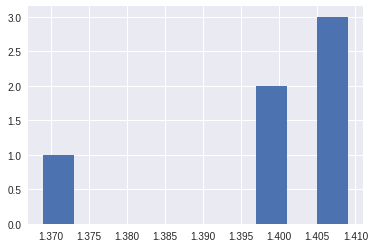

In [110]:
preisTabelle.Super.hist()